In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Muestra todas las columnas de un DataFrame
sns.set(style="whitegrid", palette="viridis") # Define un estilo de graficos

# Carga de dataset
df = pd.read_csv("../data/raw/housing.csv")

# Vista de las primeras 5 filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()        # Tipos de datos y valores nulos
df.describe()    # Estadísticas básicas
df.isnull().sum() # Ver cantidad de valores faltantes por columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12828\1635795314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
upper_limit_rooms = df['total_rooms'].quantile(0.99)
df['total_rooms'] = np.where(df['total_rooms'] > upper_limit_rooms, upper_limit_rooms, df['total_rooms'])


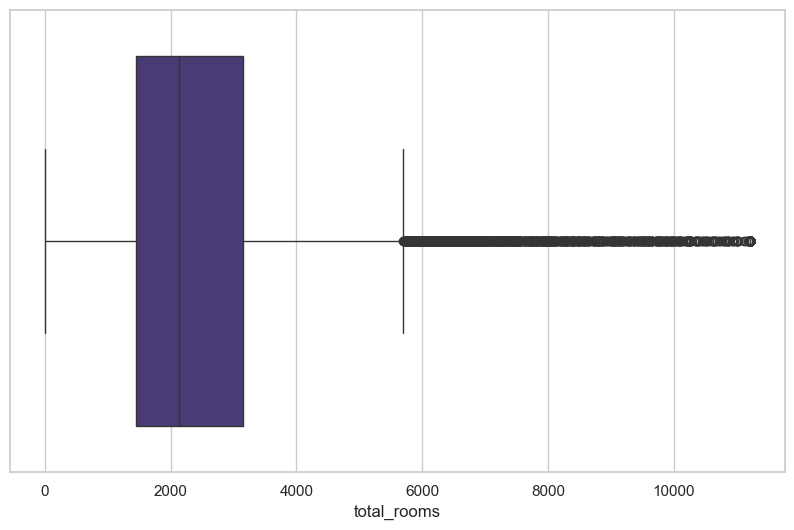

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='total_rooms', data=df)
plt.show()


In [20]:
def cap_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    """
    Limita los valores de una columna usando percentiles.
    Los valores por debajo del percentil inferior se reemplazan por ese percentil.
    Los valores por encima del percentil superior se reemplazan por ese percentil.
    """
    lower_limit = df[column].quantile(lower_quantile)
    upper_limit = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] > upper_limit, upper_limit,
                          np.where(df[column] < lower_limit, lower_limit, df[column]))


In [21]:
cols_to_cap = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in cols_to_cap:
    cap_outliers(df, col)


In [23]:
df[cols_to_cap].describe()


,total_rooms,total_bedrooms,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,2587.933055,529.271409,1404.011958,492.355941
std,1855.357967,370.434737,972.927381,336.774792
min,164.000000,37.000000,88.000000,31.000000
25%,1447.750000,297.000000,787.000000,280.000000
50%,2127.000000,435.000000,1166.000000,409.000000
75%,3148.000000,643.250000,1725.000000,605.000000
max,11199.977100,2216.270000,5805.830000,1982.660000


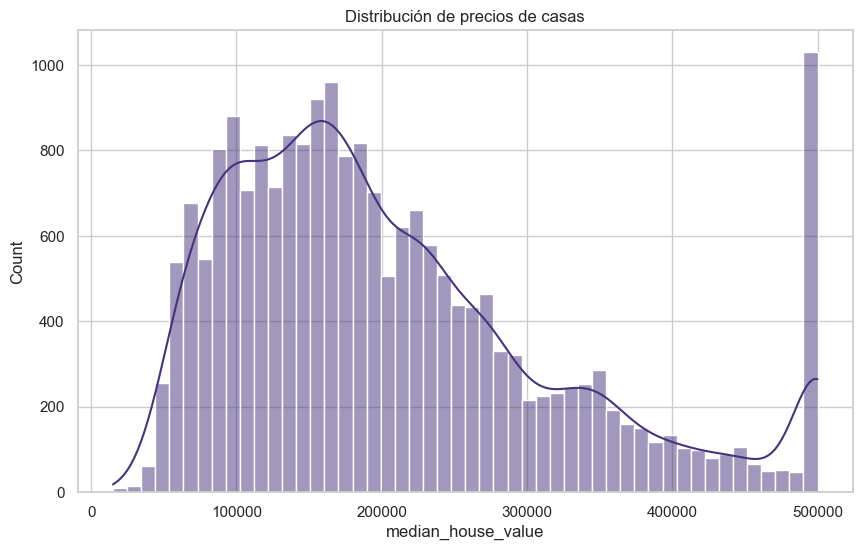

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribución de precios de casas")
plt.show()


In [24]:
# Creamos una copia del DataFrame antes del recorte
df_original = pd.read_csv("../data/raw/housing.csv")

# Solo columnas críticas
cols_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']


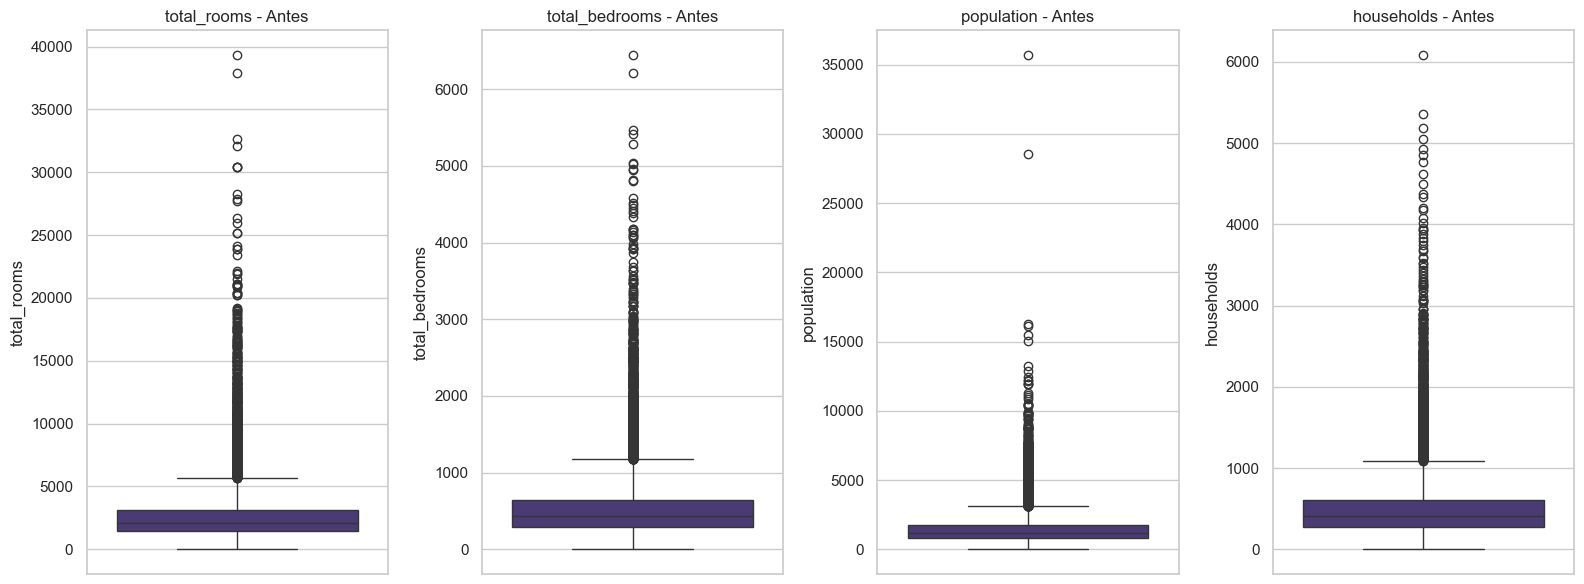

In [25]:
plt.figure(figsize=(16,6))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_original[col])
    plt.title(f"{col} - Antes")
plt.tight_layout()
plt.show()


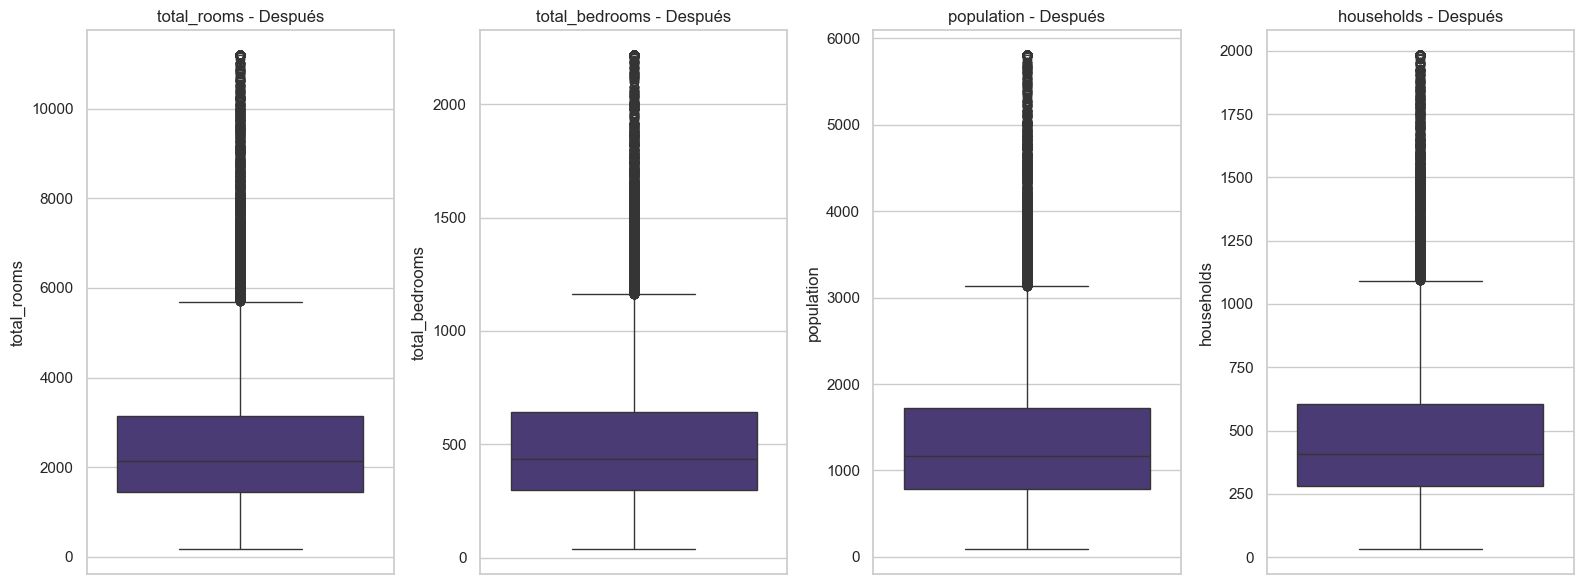

In [26]:
plt.figure(figsize=(16,6))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} - Después")
plt.tight_layout()
plt.show()


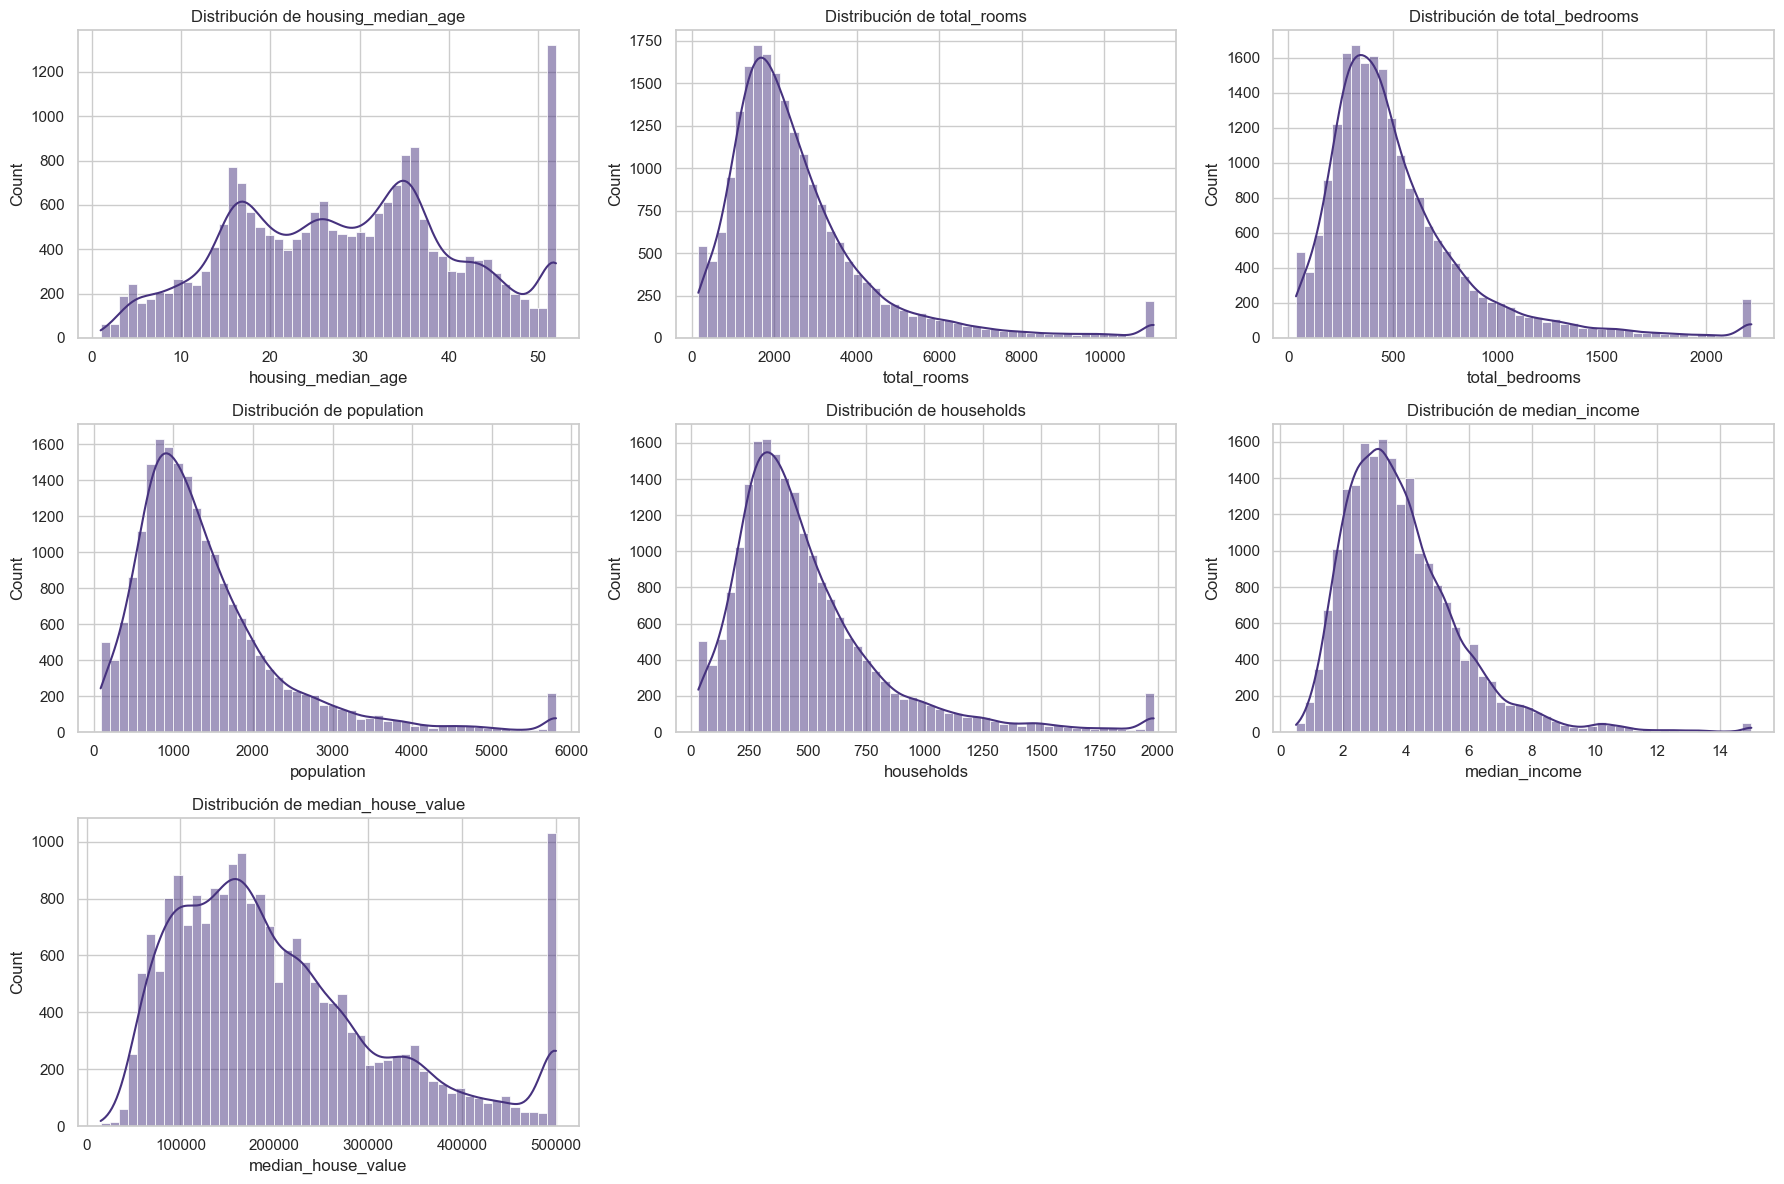

In [27]:
num_cols = ['housing_median_age','total_rooms','total_bedrooms','population',
            'households','median_income','median_house_value']

plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


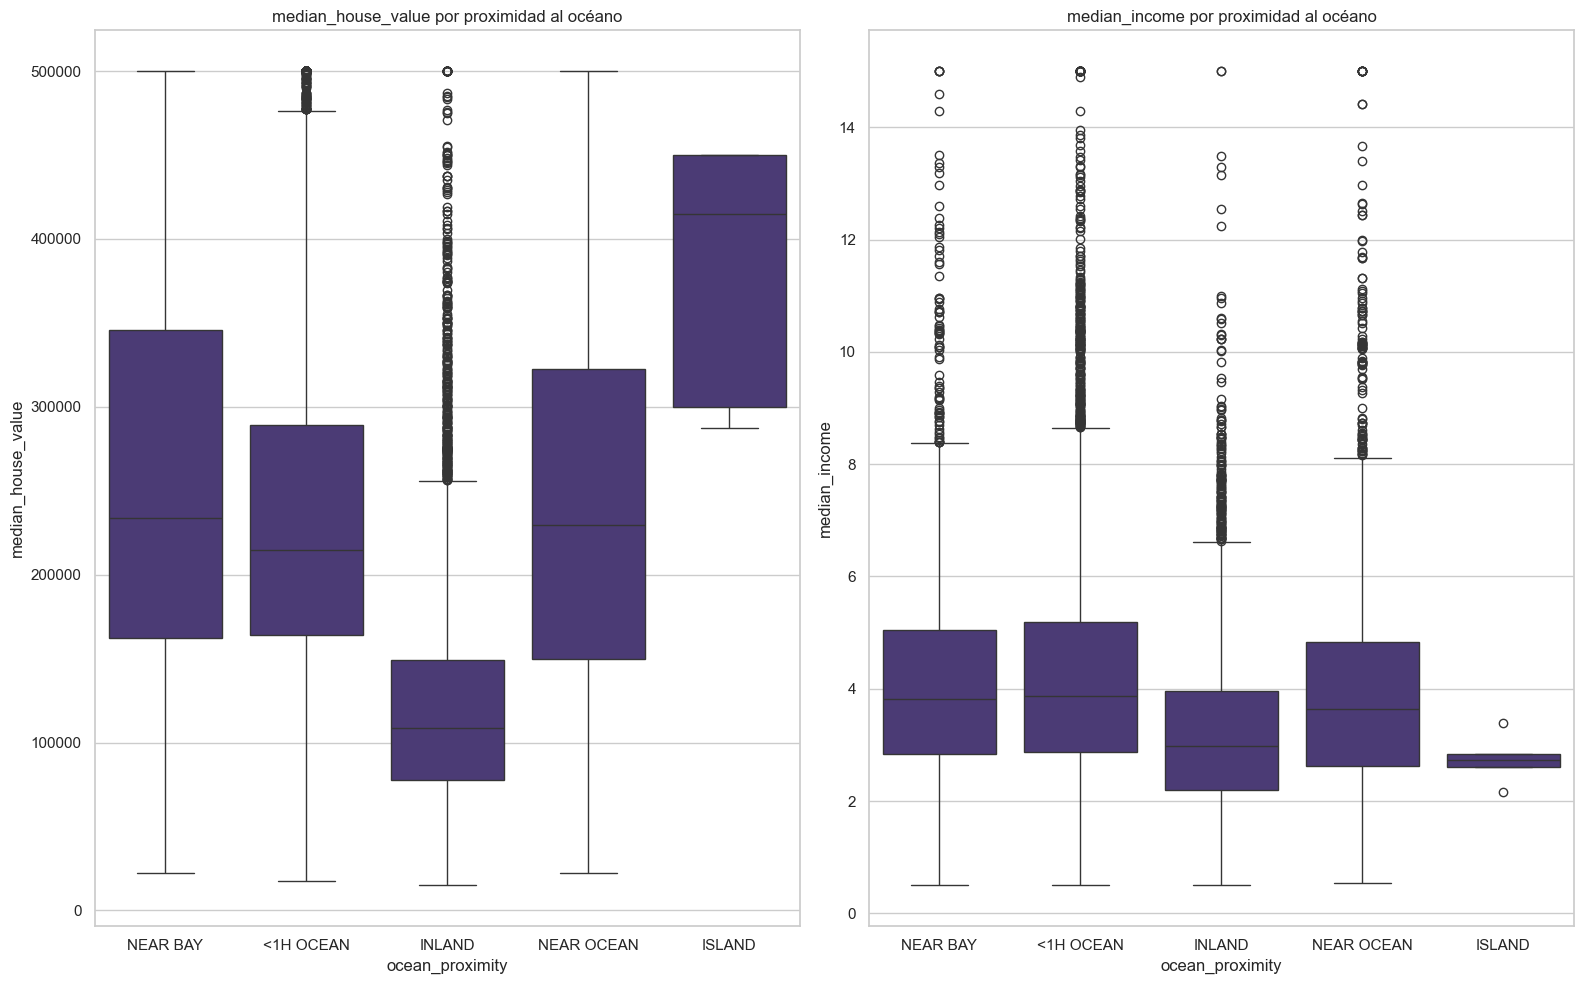

In [28]:
plt.figure(figsize=(16,10))
for i, col in enumerate(['median_house_value','median_income'], 1):
    plt.subplot(1,2,i)
    sns.boxplot(x='ocean_proximity', y=col, data=df)
    plt.title(f'{col} por proximidad al océano')
plt.tight_layout()
plt.show()


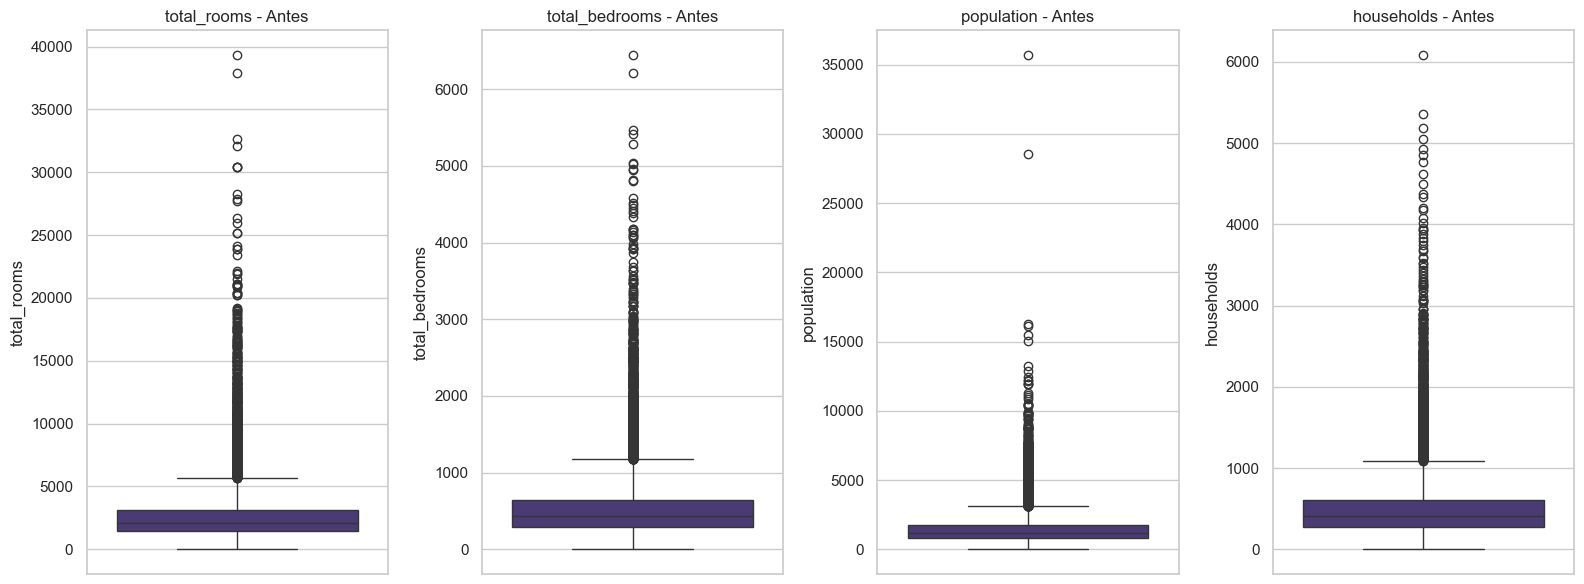

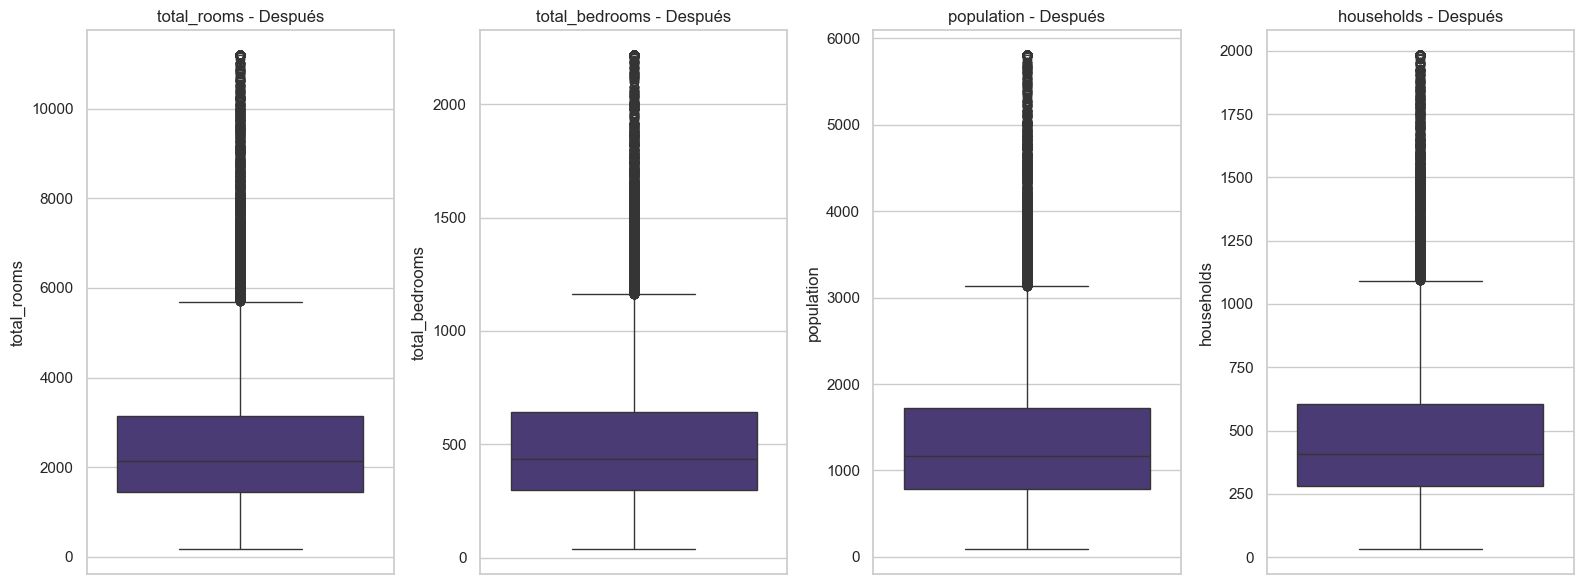

In [29]:
# Guardar copia original
df_original = pd.read_csv("../data/raw/housing.csv")
cols_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Boxplots antes
plt.figure(figsize=(16,6))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_original[col])
    plt.title(f"{col} - Antes")
plt.tight_layout()
plt.show()

# Boxplots después
plt.figure(figsize=(16,6))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} - Después")
plt.tight_layout()
plt.show()


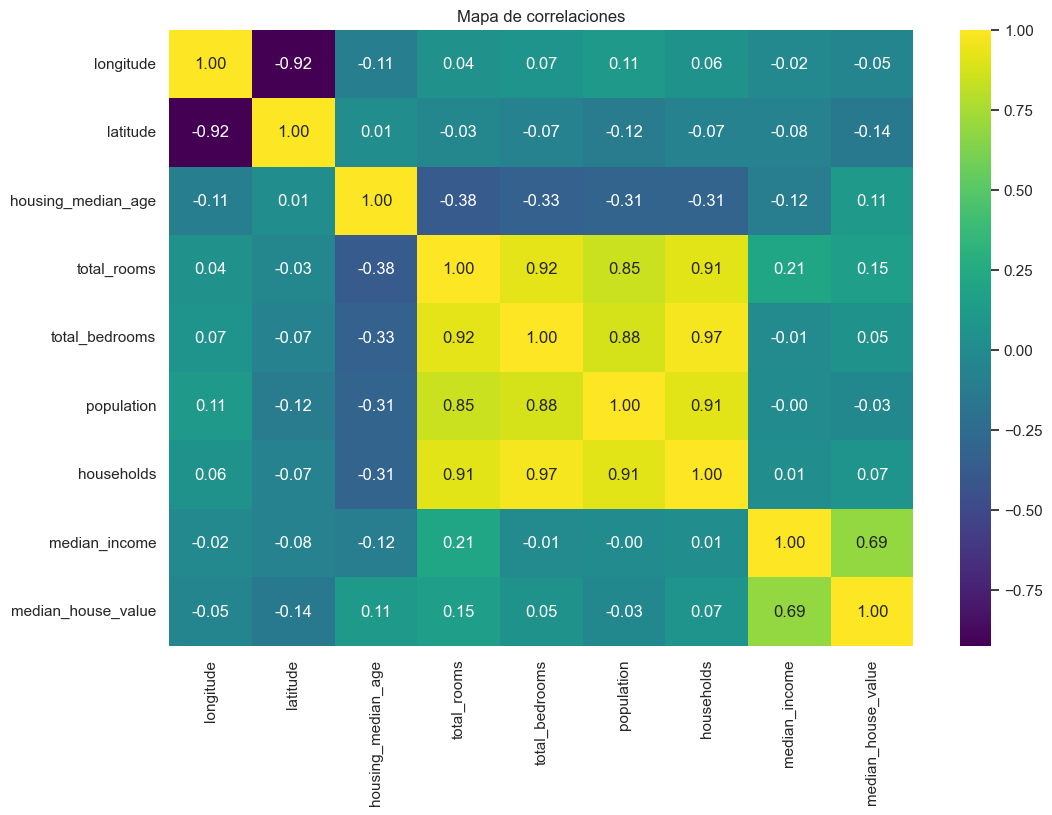

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="viridis")
plt.title("Mapa de correlaciones")
plt.show()


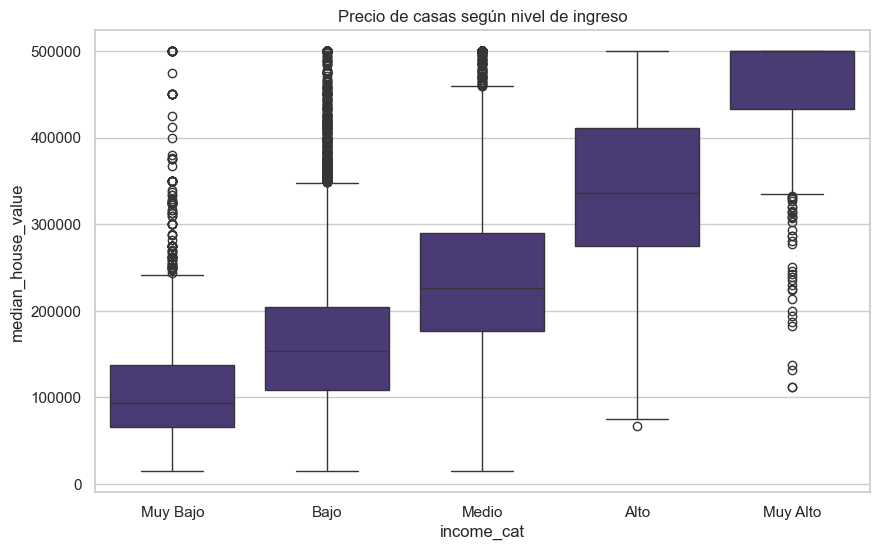

In [32]:
# Crear categorías de ingreso
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0, 2, 4, 6, 8, np.inf],
                          labels=['Muy Bajo','Bajo','Medio','Alto','Muy Alto'])

plt.figure(figsize=(10,6))
sns.boxplot(x='income_cat', y='median_house_value', data=df)
plt.title("Precio de casas según nivel de ingreso")
plt.show()


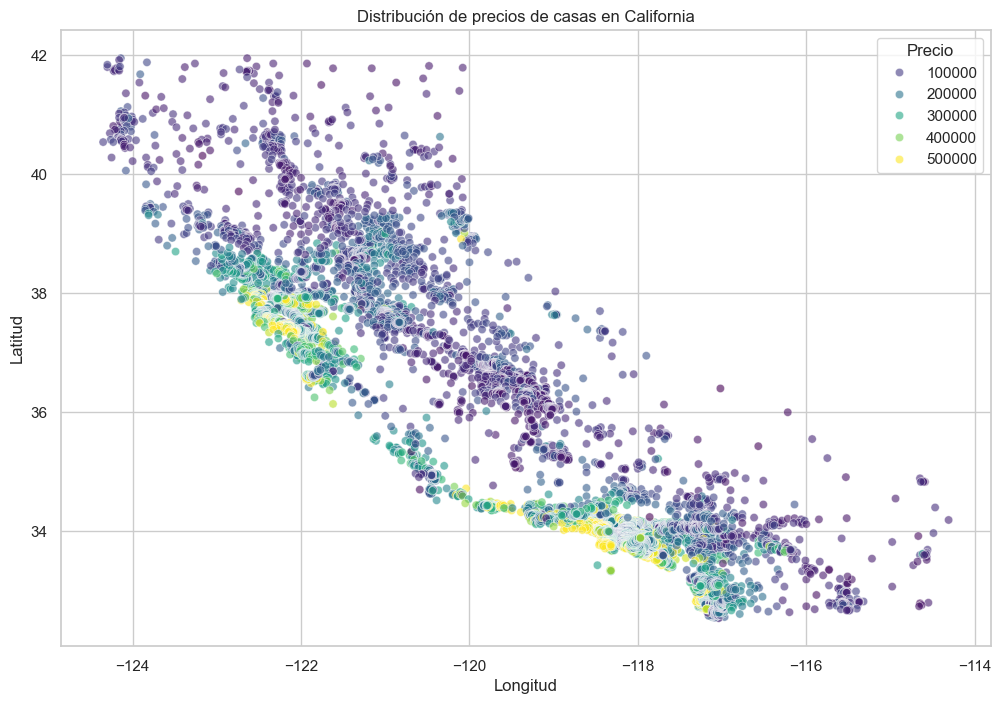

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='median_house_value',
    palette='viridis',
    data=df,
    alpha=0.6
)
plt.title("Distribución de precios de casas en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title='Precio', loc='upper right')
plt.show()


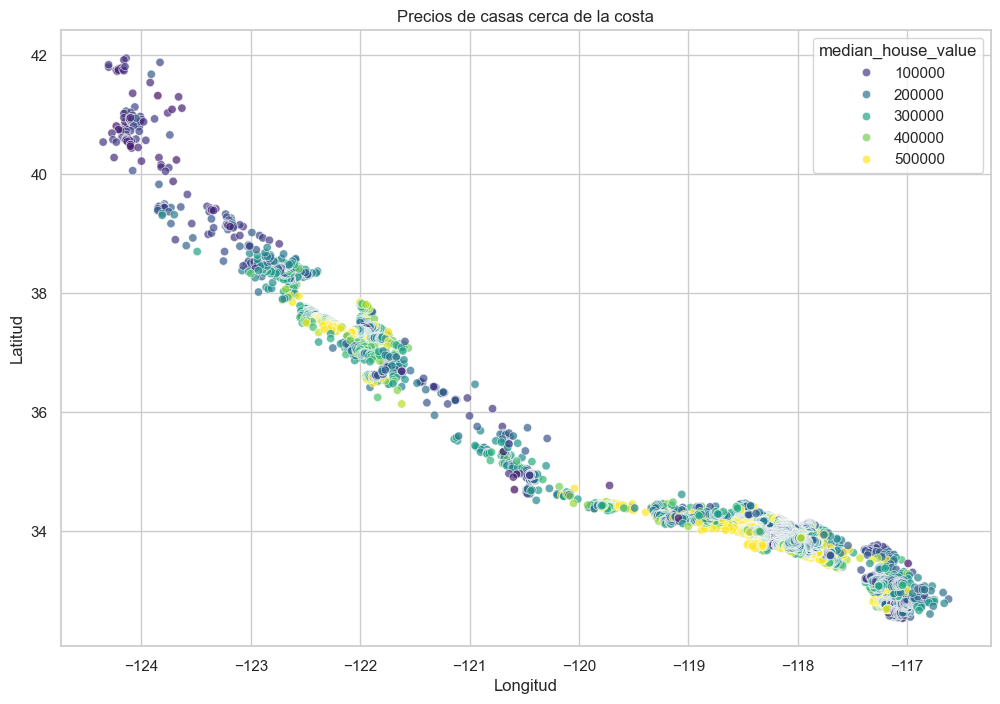

In [34]:
coastal_df = df[df['ocean_proximity'].isin(['NEAR OCEAN','<1H OCEAN'])]

plt.figure(figsize=(12,8))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='median_house_value',
    palette='viridis',
    data=coastal_df,
    alpha=0.7
)
plt.title("Precios de casas cerca de la costa")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


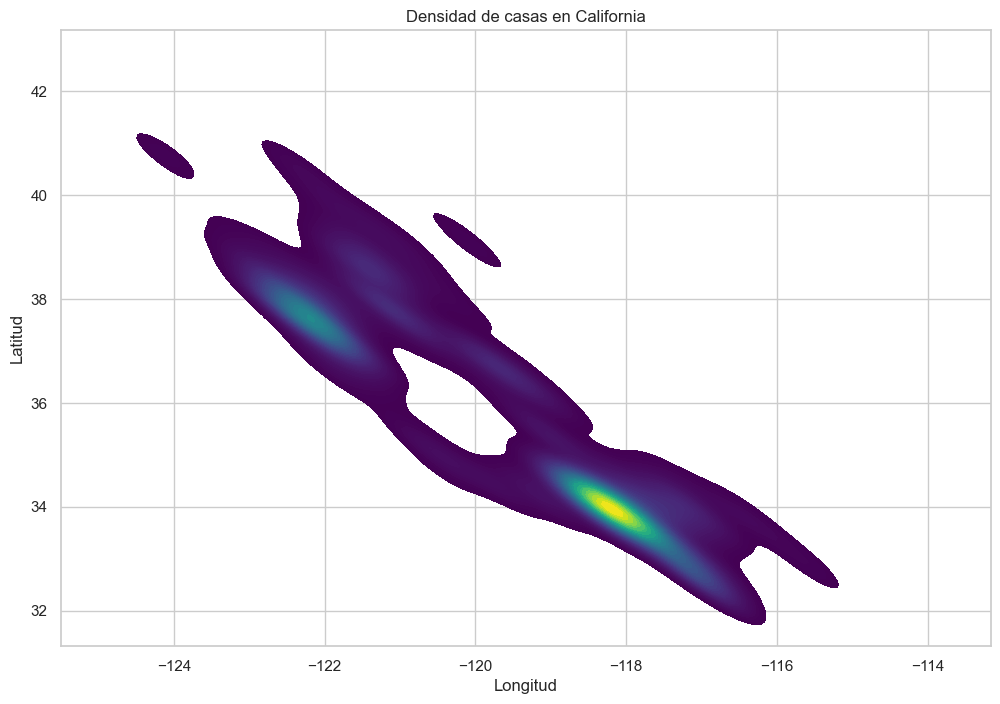

In [35]:
plt.figure(figsize=(12,8))
sns.kdeplot(
    x='longitude', y='latitude',
    data=df,
    fill=True,
    cmap='viridis',
    levels=50,
    thresh=0.05
)
plt.title("Densidad de casas en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


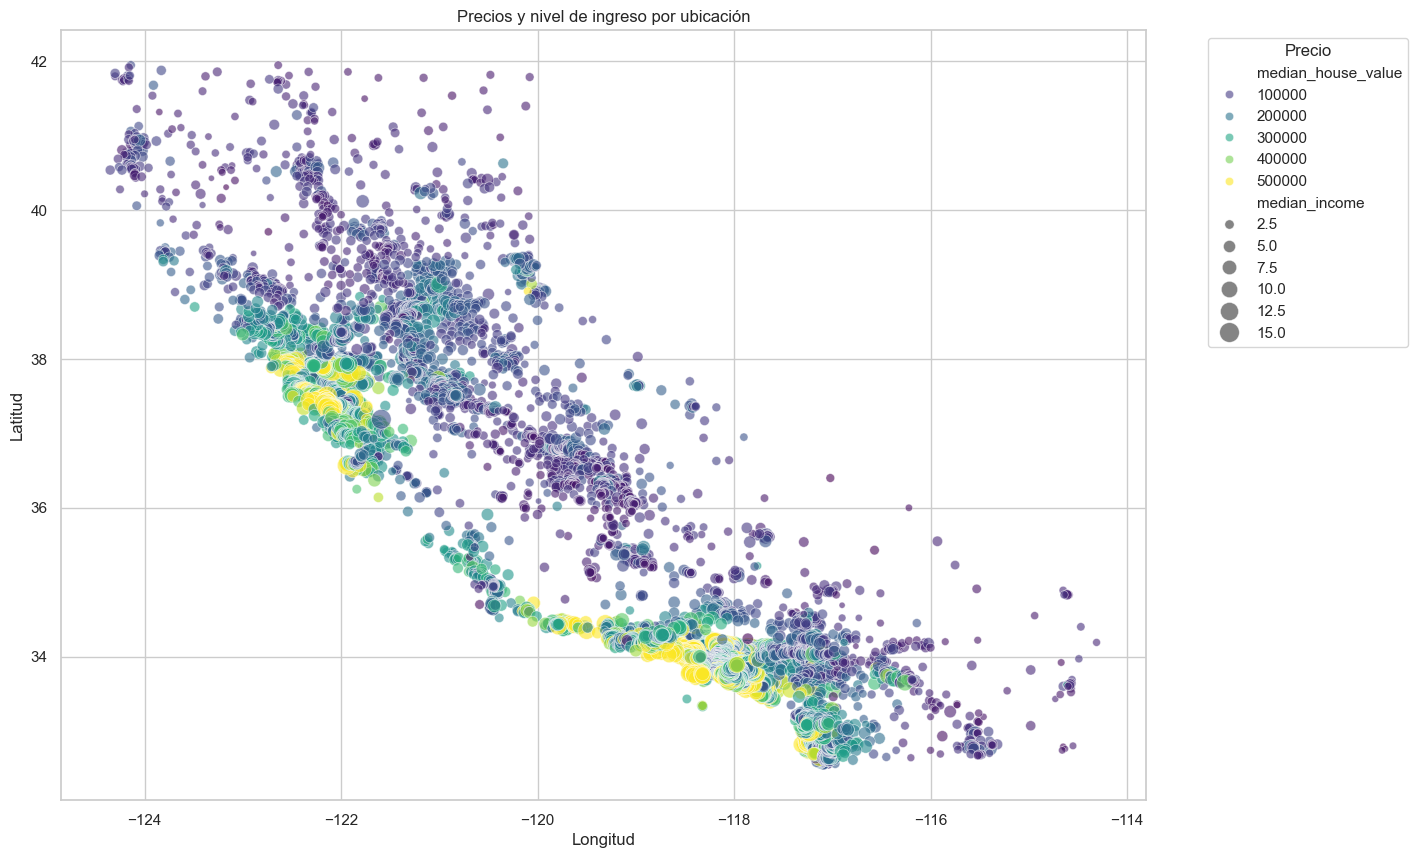

In [36]:
plt.figure(figsize=(14,10))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='median_house_value',
    size='median_income',
    palette='viridis',
    sizes=(20,200),
    data=df,
    alpha=0.6
)
plt.title("Precios y nivel de ingreso por ubicación")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


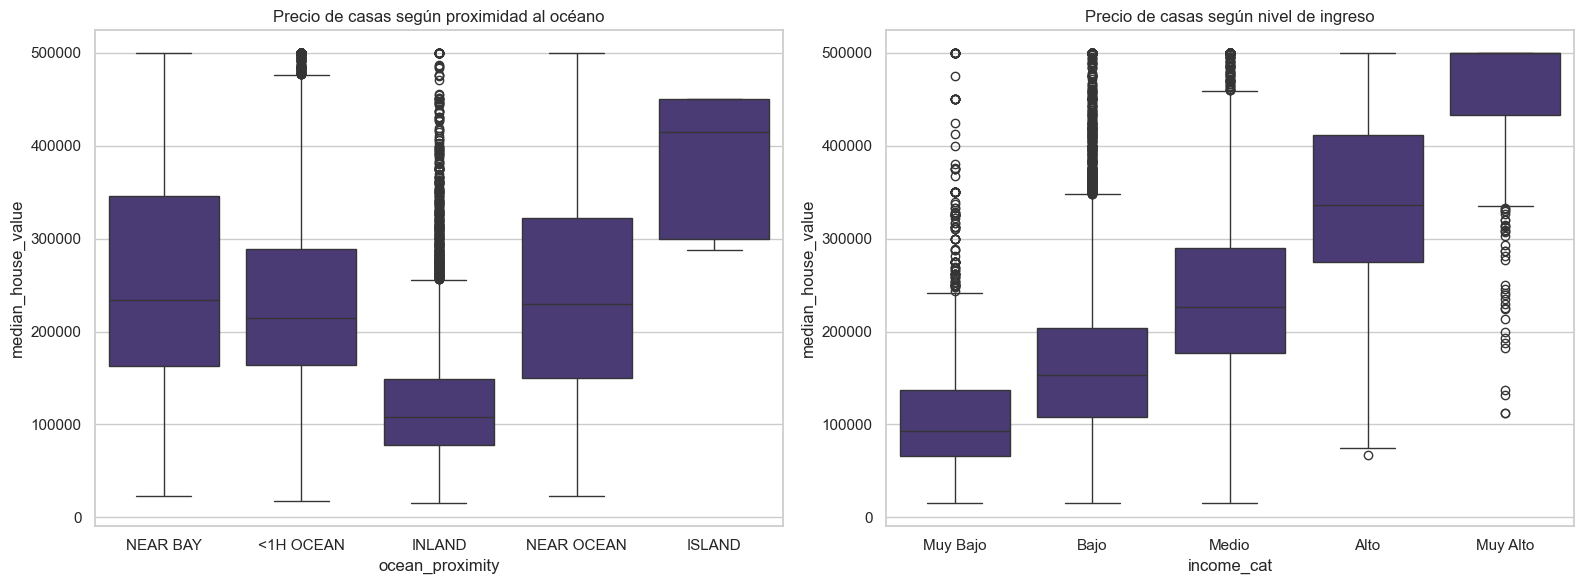

In [37]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title("Precio de casas según proximidad al océano")

plt.subplot(1,2,2)
sns.boxplot(x='income_cat', y='median_house_value', data=df)
plt.title("Precio de casas según nivel de ingreso")

plt.tight_layout()
plt.show()


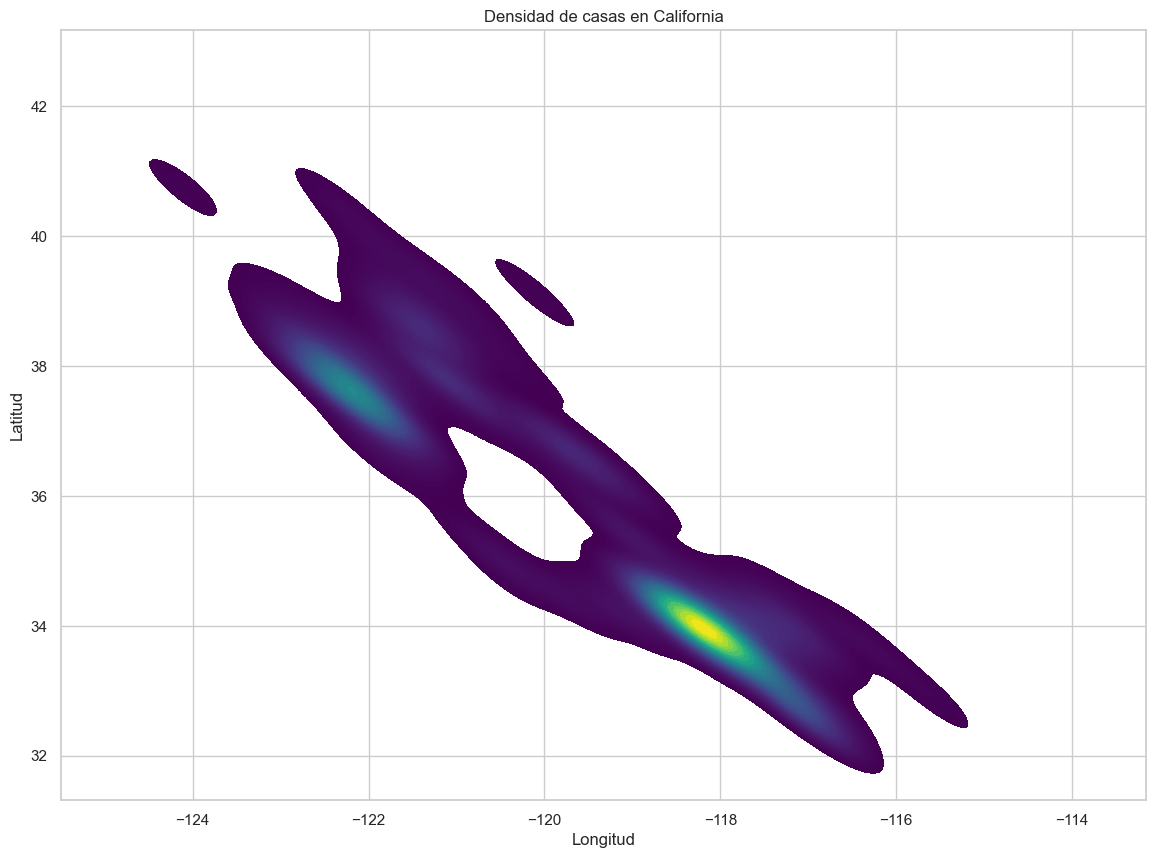

In [38]:
plt.figure(figsize=(14,10))
sns.kdeplot(
    x='longitude', y='latitude',
    data=df,
    fill=True,
    cmap='viridis',
    levels=50,
    thresh=0.05
)
plt.title("Densidad de casas en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()
